Nombre de lignes : 5012
Nombre de colonnes : 13
Types de colonnes :
 Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type          object
NumberOfWindows        object
Geo_Code               object
Claim                  object
dtype: object
Valeurs manquantes :
 Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64
Statistiques descriptives :
        Customer Id  YearOfObservation  Insured_Period  Residential  \
count         5012        5012.000000     5012.000000  5012.000000  

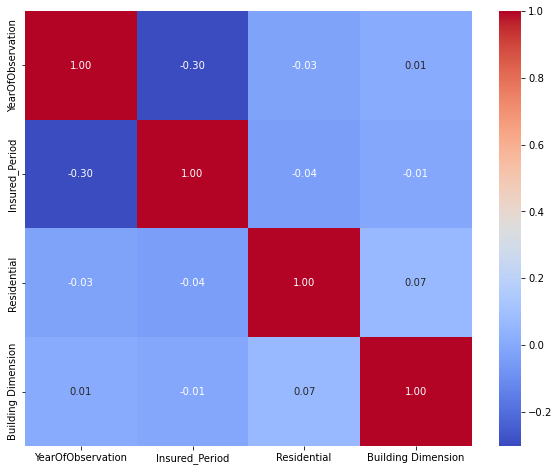

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Charger les données
train_data = pd.read_csv('train_insurance.csv')
test_data = pd.read_csv('test_insurance.csv')

# Analyse exploratoire des données
print("Nombre de lignes :", len(train_data))
print("Nombre de colonnes :", len(train_data.columns))
print("Types de colonnes :\n", train_data.dtypes)
print("Valeurs manquantes :\n", train_data.isna().sum())

# Statistiques descriptives
print("Statistiques descriptives :\n", train_data.describe(include="all"))

# Identification des valeurs manquantes et des outliers
total_missing = train_data.isna().sum().sum()
print("Nombre total de valeurs manquantes :", total_missing)

# Exploration initiale
L = list(train_data.columns)
L_num = list(train_data.select_dtypes(exclude='object').columns)
L_d = list(train_data.select_dtypes(include='object').columns)
print("Liste des colonnes :")
print(L)
print("Liste des colonnes numériques :")
print(L_num)
print("Liste des attributs discrets :")
print(L_d)

# Statistiques descriptives
descriptives_numeric = train_data.describe()
descriptives_all = train_data.describe(include='all')
print("Statistiques descriptives (attributs numériques) :")
print(descriptives_numeric)
print("Statistiques descriptives (tous les attributs) :")
print(descriptives_all)

# Identification des valeurs manquantes
missing_values = train_data.isnull().sum()
total_missing = train_data.isnull().sum().sum()
print("Valeurs manquantes par attribut :")
print(missing_values)
print("Nombre total de valeurs manquantes :")
print(total_missing)





import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que train_data est votre DataFrame
# train_data = pd.read_csv('your_dataset.csv')

# Calculer la matrice de corrélation
corr_matrix = train_data.corr()

# Créer un heatmap
plt.figure(figsize=(10,8)) # Taille de la figure
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Afficher le heatmap
plt.show()




In [25]:
# Suppression des instances ayant des valeurs manquantes dans la colonne 'Garden'
train_data = train_data.dropna(subset=['Garden'])

# Remplissage des valeurs manquantes dans 'Building Dimension' par la médiane
median_imputer = SimpleImputer(strategy='median')
train_data['Building Dimension'] = median_imputer.fit_transform(train_data['Building Dimension'].values.reshape(-1,1))

# Remplissage des valeurs manquantes dans 'Geo_Code' par l’élément le plus fréquent
freq_imputer = SimpleImputer(strategy='most_frequent')
train_data['Geo_Code'] = freq_imputer.fit_transform(train_data['Geo_Code'].values.reshape(-1,1))

# Identification des valeurs manquantes
missing_values = train_data.isnull().sum()
total_missing = train_data.isnull().sum().sum()
print("Valeurs manquantes par attribut :")
print(missing_values)
print("Nombre total de valeurs manquantes :")
print(total_missing)




Valeurs manquantes par attribut :
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64
Nombre total de valeurs manquantes :
0


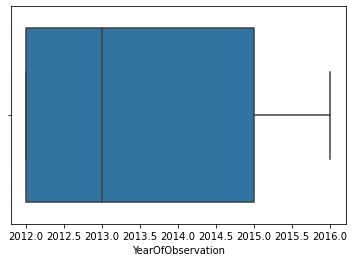

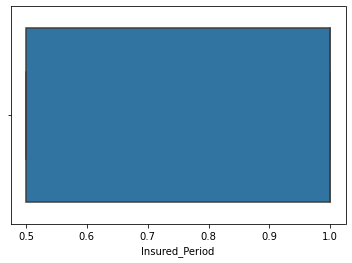

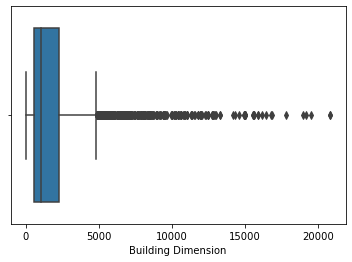

In [26]:
import numpy as np
import seaborn as sns


# Liste des colonnes pour lesquelles vous voulez traiter les valeurs aberrantes
cols = ['YearOfObservation', 'Insured_Period', 'Building Dimension']

for col in cols:
    # Affichage d'un boxplot pour la colonne
    sns.boxplot(data=train_data, x=col)
    plt.show()

    # Calcul des quartiles et de l'écart interquartile
    Q1, Q3 = np.percentile(train_data[col], [25, 75])
    IQR = Q3 - Q1

    # Calcul des limites pour les valeurs aberrantes
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Remplacement des valeurs aberrantes par les limites
    train_data[col] = np.where(train_data[col] >= upper_limit, upper_limit,
                       np.where(train_data[col] <= lower_limit, lower_limit, train_data[col]))


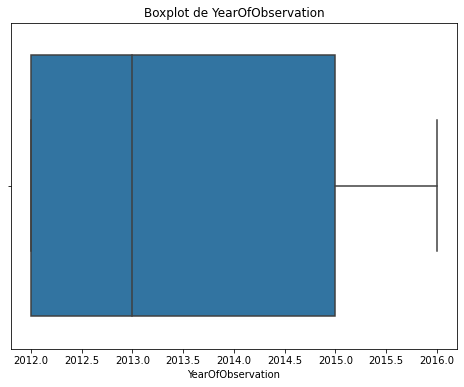

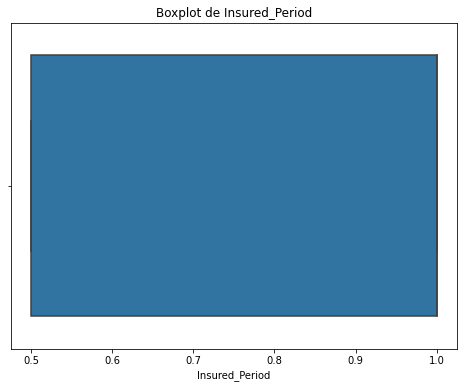

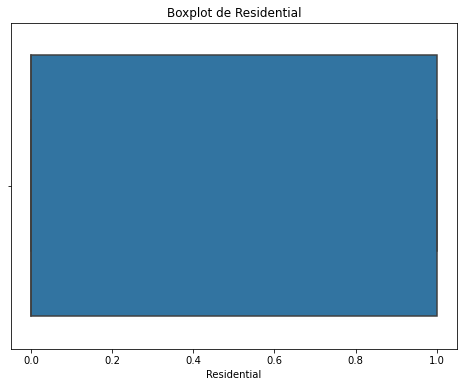

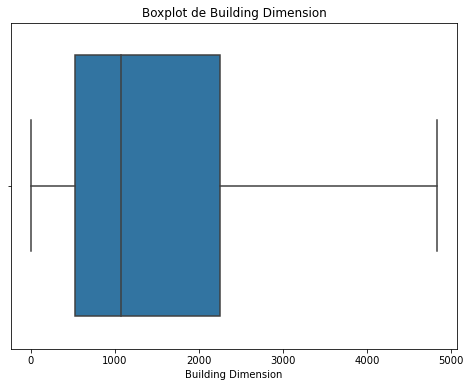

In [27]:
import numpy as np
import seaborn as sns

# Sélection des colonnes numériques
numeric_columns = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension']

# Création de boxplots pour chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_data[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

    # Calcul des limites pour les valeurs aberrantes
    Q1, Q3 = np.percentile(train_data[column], [25, 75])
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Identification des valeurs aberrantes
    outliers = train_data[column][(train_data[column] > upper_limit) | (train_data[column] < lower_limit)]

    
    
    # Traitement des valeurs aberrantes
    train_data[column] = np.where(train_data[column] >= upper_limit, upper_limit,
                          np.where(train_data[column] <= lower_limit, lower_limit, train_data[column]))
    


In [28]:
print(train_data[train_data.duplicated()])


Empty DataFrame
Columns: [Customer Id, YearOfObservation, Insured_Period, Residential, Building_Painted, Building_Fenced, Garden, Settlement, Building Dimension, Building_Type, NumberOfWindows, Geo_Code, Claim]
Index: []


Moyenne de YearOfObservation : 2013.6605431309904
Médiane de YearOfObservation : 2013.0
Mode de YearOfObservation : 2012.0


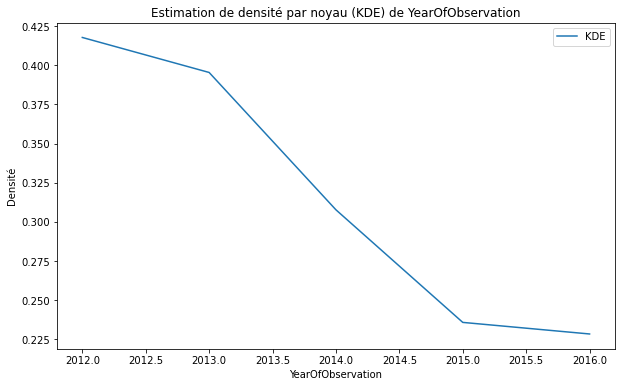

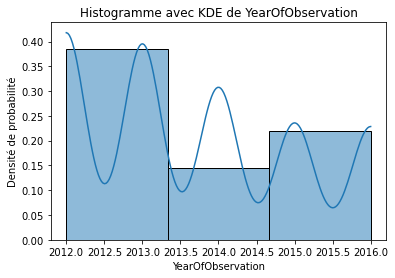

Moyenne de Insured_Period : 0.8696086261980831
Médiane de Insured_Period : 1.0
Mode de Insured_Period : 1.0


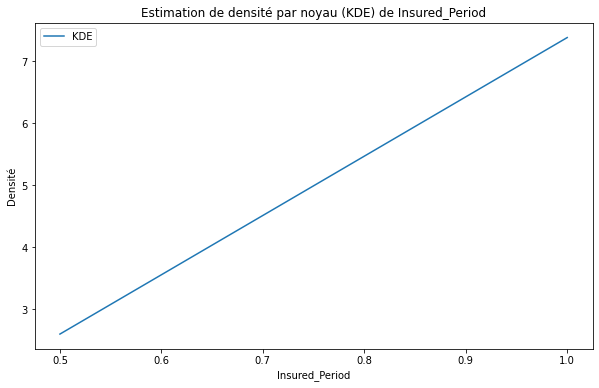

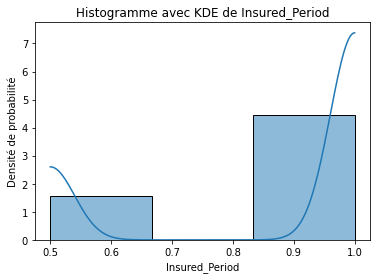

Moyenne de Building Dimension : 1617.710463258786
Médiane de Building Dimension : 1067.0
Mode de Building Dimension : 550.0


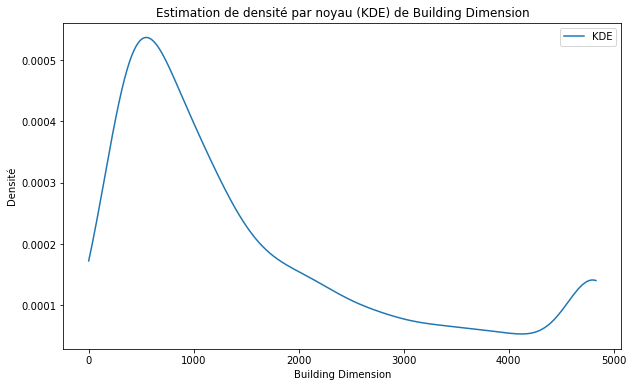

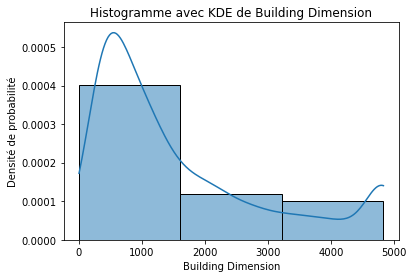

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt



# Liste des colonnes pour lesquelles vous voulez créer des KDE
cols = ['YearOfObservation', 'Insured_Period', 'Building Dimension']

for col in cols:
    # Calcul de la moyenne
    moyenne = train_data[col].mean()
    print("Moyenne de " + col + " :", moyenne)

    # Calcul de la médiane
    median = train_data[col].median()
    print("Médiane de " + col + " :", median)

    # Calcul du mode
    train_data.sort_values(by=col, inplace=True)
    x_vals = train_data[col].values
    kde = gaussian_kde(x_vals)
    y_vals = kde(x_vals)
    valeur_mode = x_vals[np.argmax(y_vals)]
    print("Mode de " + col + " :", valeur_mode)

    # Affichage du graphe KDE
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="KDE")
    plt.xlabel(col)
    plt.ylabel('Densité')
    plt.title('Estimation de densité par noyau (KDE) de ' + col)
    plt.legend()
    plt.show()

    # Créer un histogramme pour la colonne
    sns.histplot(x=col, data=train_data, bins=3, kde=True, stat='density')
    plt.title("Histogramme avec KDE de " + col)
    plt.xlabel(col)
    plt.ylabel("Densité de probabilité")
    plt.show()


In [30]:
# Liste des colonnes pour lesquelles vous voulez calculer le coefficient d'asymétrie
cols = ['YearOfObservation', 'Insured_Period', 'Building Dimension']

for col in cols:
    # Calcul du coefficient d'asymétrie
    skewness = train_data[col].skew()
    print("Coefficient d'asymétrie pour " + col + " :", skewness)

    # Interprétation du coefficient d'asymétrie
    if skewness > 0:
        print("La distribution de " + col + " est asymétrique à droite.")
    elif skewness < 0:
        print("La distribution de " + col + " est asymétrique à gauche.")
    else:
        print("La distribution de " + col + " est symétrique.")


Coefficient d'asymétrie pour YearOfObservation : 0.35220343150943145
La distribution de YearOfObservation est asymétrique à droite.
Coefficient d'asymétrie pour Insured_Period : -1.0900015827602816
La distribution de Insured_Period est asymétrique à gauche.
Coefficient d'asymétrie pour Building Dimension : 1.133249989191608
La distribution de Building Dimension est asymétrique à droite.


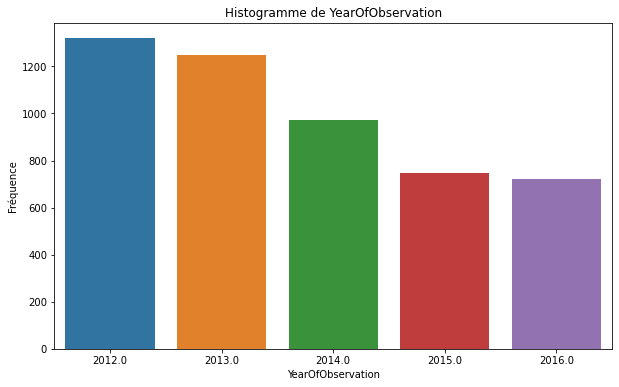

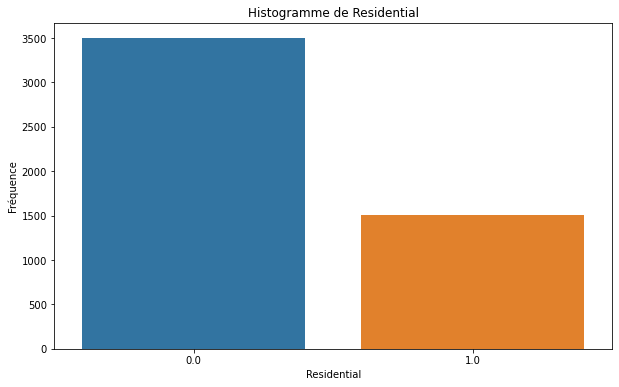

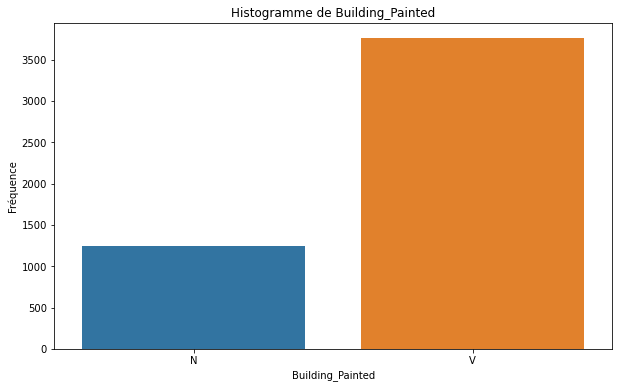

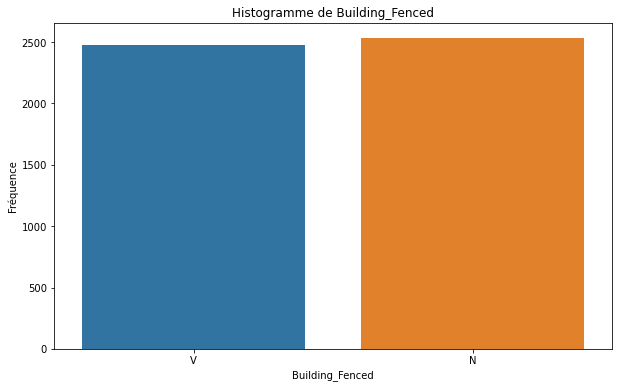

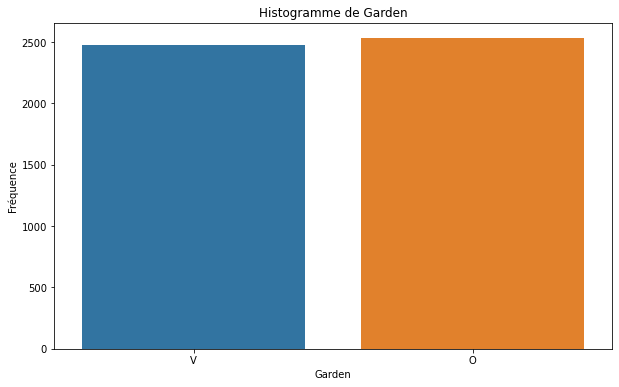

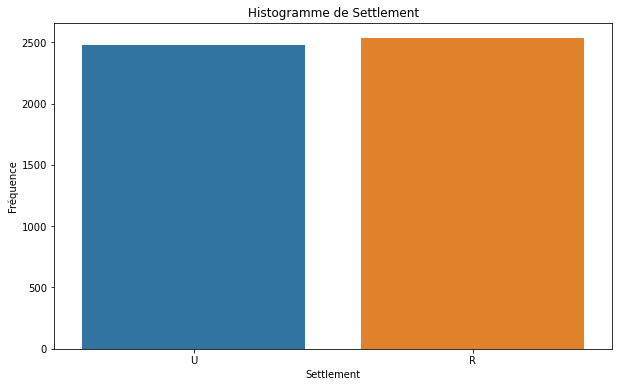

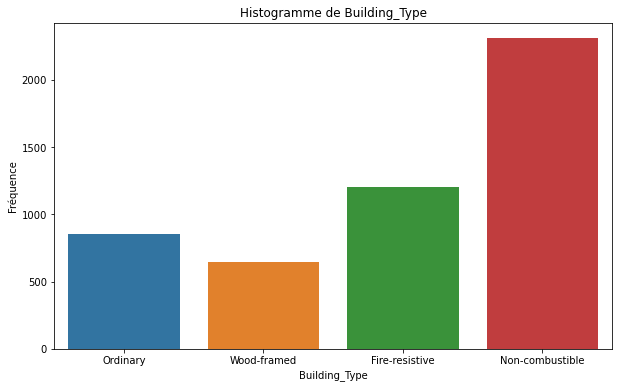

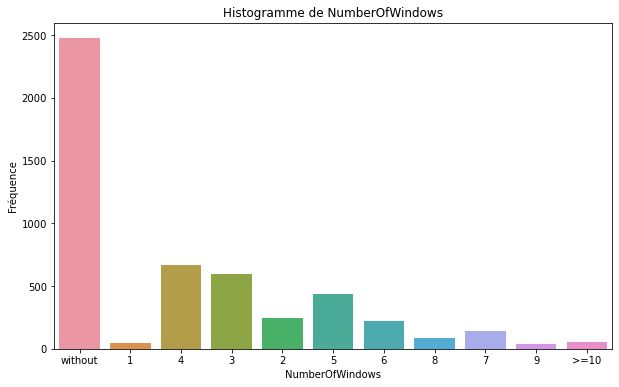

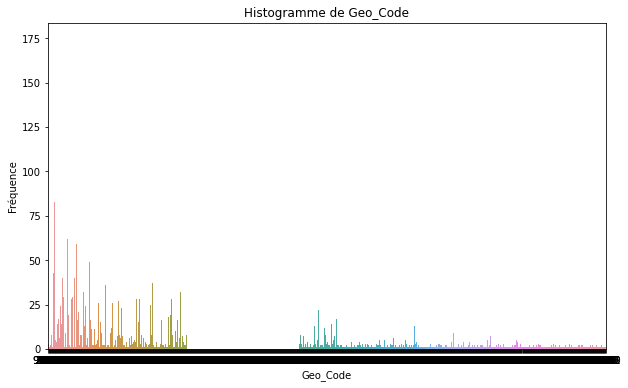

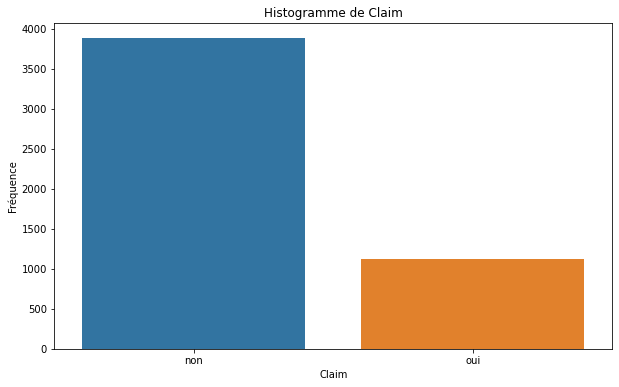

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Liste des colonnes pour lesquelles vous voulez créer des histogrammes
cols = ['YearOfObservation', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows', 'Geo_Code', 'Claim']

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=train_data)
    plt.title('Histogramme de ' + col)
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()


<AxesSubplot:xlabel='Claim', ylabel='count'>

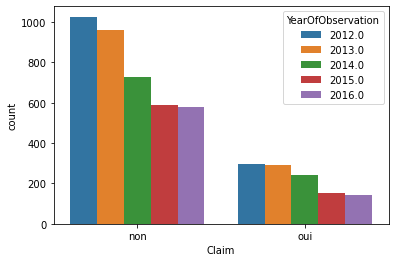

In [32]:
sns.countplot(x='Claim', data=train_data, hue ='YearOfObservation') 

<AxesSubplot:xlabel='Claim', ylabel='count'>

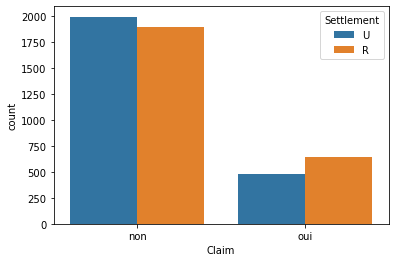

In [33]:
sns.countplot(x='Claim', data=train_data, hue ='Settlement')

C:\Users\Amine2001\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amine2001\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amine2001\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amine2001\

<AxesSubplot:xlabel='Settlement', ylabel='count'>

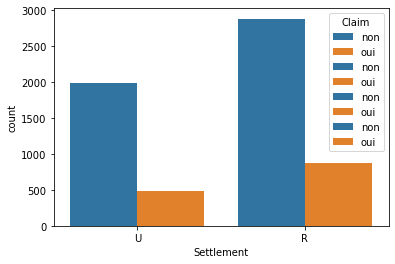

In [34]:
sns.countplot(train_data['Building_Painted'], hue='Claim', data=train_data)
sns.countplot(train_data['Building_Fenced'], hue='Claim', data=train_data)
sns.countplot(train_data['Garden'], hue='Claim', data=train_data)
sns.countplot(train_data['Settlement'], hue='Claim', data=train_data)



In [35]:
from sklearn.preprocessing import LabelEncoder

# Création d'une instance de LabelEncoder
label_encoder = LabelEncoder()

# Application de l'encodage de label à la colonne 'Claim'
train_data['Claim'] = label_encoder.fit_transform(train_data['Claim'])





In [36]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd





# Pour la standardisation RobustScaler
robust_scaler = RobustScaler()
train_data['Building Dimension'] = robust_scaler.fit_transform(train_data[['Building Dimension']])

print(train_data)
# Affichez les statistiques descriptives des données mises à l'échelle
print(train_data.describe())


     Customer Id  YearOfObservation  Insured_Period  Residential  \
2882      H13389             2014.0             1.0          1.0   
3421       H4552             2015.0             1.0          0.0   
4177       H6756             2012.0             0.5          1.0   
884       H14143             2012.0             0.5          1.0   
953        H4553             2016.0             1.0          0.0   
...          ...                ...             ...          ...   
2499      H17781             2013.0             1.0          1.0   
188       H19405             2015.0             1.0          0.0   
1050      H15819             2012.0             1.0          1.0   
4474      H13777             2015.0             1.0          1.0   
2661       H4650             2012.0             1.0          0.0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
2882                N               V      V          U           -0.619767   
3421                V    

In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Création d'une instance de LabelEncoder
label_encoder = LabelEncoder()

# Transformation des valeurs textuelles en valeurs numériques pour certaines colonnes
train_data["Building_Painted"] = label_encoder.fit_transform(train_data["Building_Painted"])
train_data["Building_Fenced"] = label_encoder.fit_transform(train_data["Building_Fenced"])
train_data["Garden"] = label_encoder.fit_transform(train_data["Garden"])
train_data["Settlement"] = label_encoder.fit_transform(train_data["Settlement"])
train_data["NumberOfWindows"] = label_encoder.fit_transform(train_data["NumberOfWindows"])
train_data["Insured_Period"] = label_encoder.fit_transform(train_data["Insured_Period"])
train_data["Building_Type"] = label_encoder.fit_transform(train_data["Building_Type"])





# Affichage du DataFrame final
print(train_data)



     Customer Id  YearOfObservation  Insured_Period  Residential  \
2882      H13389             2014.0               1          1.0   
3421       H4552             2015.0               1          0.0   
4177       H6756             2012.0               0          1.0   
884       H14143             2012.0               0          1.0   
953        H4553             2016.0               1          0.0   
...          ...                ...             ...          ...   
2499      H17781             2013.0               1          1.0   
188       H19405             2015.0               1          0.0   
1050      H15819             2012.0               1          1.0   
4474      H13777             2015.0               1          1.0   
2661       H4650             2012.0               1          0.0   

      Building_Painted  Building_Fenced  Garden  Settlement  \
2882                 0                1       1           1   
3421                 1                1       1          

In [38]:
train_data.corr()['Claim'].sort_values()


Garden               -0.070060
Settlement           -0.069845
Building_Fenced      -0.069317
YearOfObservation    -0.020097
NumberOfWindows       0.002372
Building_Painted      0.036023
Residential           0.055285
Insured_Period        0.070157
Building_Type         0.114222
Building Dimension    0.295732
Claim                 1.000000
Name: Claim, dtype: float64

In [39]:


from sklearn.preprocessing import KBinsDiscretizer

# Création d'une instance de KBinsDiscretizer pour une discrétisation Equal-Width
discretizer_uniform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Discrétisation Equal-Width pour 'YearOfObservation'
train_data['YearOfObservation'] = discretizer_uniform.fit_transform(train_data[['YearOfObservation']])

# Création d'une instance de KBinsDiscretizer pour une discrétisation Equal-Frequency
discretizer_quantile = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# Discrétisation Equal-Frequency pour 'Building Dimension'
train_data['Building Dimension'] = discretizer_quantile.fit_transform(train_data[['Building Dimension']])


print(train_data)


     Customer Id  YearOfObservation  Insured_Period  Residential  \
2882      H13389                5.0               1          1.0   
3421       H4552                7.0               1          0.0   
4177       H6756                0.0               0          1.0   
884       H14143                0.0               0          1.0   
953        H4553                9.0               1          0.0   
...          ...                ...             ...          ...   
2499      H17781                2.0               1          1.0   
188       H19405                7.0               1          0.0   
1050      H15819                0.0               1          1.0   
4474      H13777                7.0               1          1.0   
2661       H4650                0.0               1          0.0   

      Building_Painted  Building_Fenced  Garden  Settlement  \
2882                 0                1       1           1   
3421                 1                1       1          

In [40]:
# Suppression de certaines colonnes qui ne seront pas utilisées
## Customer Id : Cet attribut semble être un identifiant unique pour chaque client. 
# En général, nous n’utilisons pas les identifiants dans les modèles de machine learning 
# car ils n’ont pas de pouvoir prédictif. Vous pouvez donc ignorer cet attribut.





train_data.drop(['Customer Id', 'Geo_Code', 'NumberOfWindows'], axis=1, inplace=True)


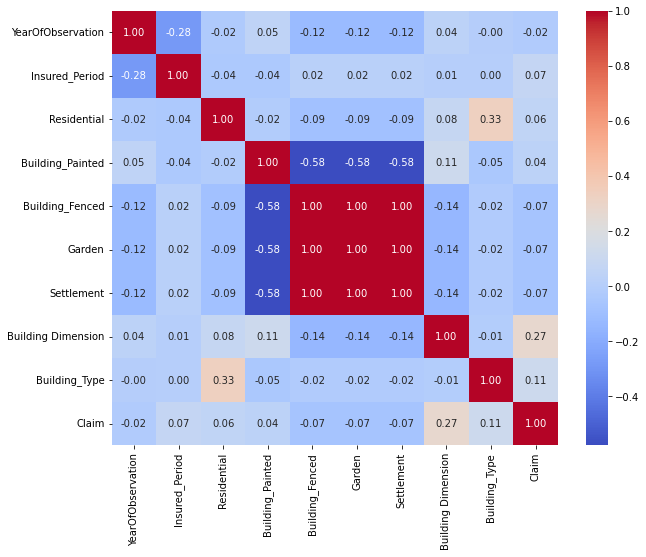

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que train_data est votre DataFrame
# train_data = pd.read_csv('your_dataset.csv')

# Calculer la matrice de corrélation
corr_matrix = train_data.corr()

# Créer un heatmap
plt.figure(figsize=(10,8)) # Taille de la figure
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Afficher le heatmsap
plt.show()


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



# Prétraitement des données
le = LabelEncoder()
categorical_features = ['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'Claim']
for feature in categorical_features:
    train_data[feature] = le.fit_transform(train_data[feature])
    test_data[feature] = le.transform(test_data[feature])

train_data['NumberOfWindows'] = train_data['NumberOfWindows'].replace('without', 0).replace('>=10', 10).astype(int)
test_data['NumberOfWindows'] = test_data['NumberOfWindows'].replace('without', 0).replace('>=10', 10).astype(int)

# Supprimer la colonne 'Geo Code'
train_data = train_data.drop('Geo_Code', axis=1)
test_data = test_data.drop('Geo_Code', axis=1)

# Séparer les caractéristiques et la cible
X_train = train_data.drop(['Claim', 'Customer Id'], axis=1)
y_train = train_data['Claim']
X_test = test_data.drop(['Claim', 'Customer Id'], axis=1)
y_test = test_data['Claim']

# Remplir les valeurs NaN avec la moyenne de la colonne
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Supprimer les lignes contenant des valeurs NaN
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]


# Initialiser les modèles
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    MLPClassifier()
]

# Entraîner et évaluer chaque modèle
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f'Score for {model.__class__.__name__}: {score}')


ValueError: y contains previously unseen labels: 'V'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialiser les modèles
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    MLPClassifier()
]

plt.figure(figsize=(10, 10))

# Entraîner et évaluer chaque modèle
for model in models:
    model.fit(X_train, y_train)
    # Prédire les probabilités de la classe positive
    y_score = model.predict_proba(X_test)[:, 1]
    # Calculer les points de la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    # Calculer l'AUC
    roc_auc = auc(fpr, tpr)
    # Afficher la courbe ROC
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Afficher la ligne de hasard
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()


